# Data loading and validation

## Dataset Notation

### Data Source
- Dataset: `Video_Games.jsonl` - Amazon Video Games product reviews
- Source: [amazon-reviews-2023.github.io](https://amazon-reviews-2023.github.io/)
- Format: JSONL (JSON Lines) - one review per line

### Key Variables
- `file_review`: Path to the dataset file (string)
- `fp`: File pointer for reading the JSONL file
- `i`: Line counter (integer) used in iteration
- `line`: Raw JSON string from each line

### Review Fields
Each review contains the following fields:
- `asin`: Amazon Standard Identification Number - unique product identifier
- `reviewerID`: Unique reviewer identifier
- `reviewerName`: Name of the reviewer
- `reviewText`: Full text of the review
- `summary`: Brief review summary/title
- `unixReviewTime`: Unix timestamp of review
- `reviewTime`: Human-readable review date
- `overall`: Rating score (1-5)
- `helpful`: Array [helpful votes, total votes]

### Data Processing Notes
- Each line needs to be parsed with `json.loads()` to convert from JSON string to Python dictionary
- Empty lines should be skipped using `strip()` before parsing
- Some fields may be missing or null in certain reviews
- The `helpful` field contains a list of two integers: [helpful votes, total votes]
- Ratings in `overall` are on a 1-5 scale

In [24]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import review file
file_review = "../data/Video_Games.jsonl"

In [3]:
#diplay first 5 lines

with open(file_review, 'r') as fp:
    for i, line in enumerate(fp):
        if i >= 5:  # Limit to the first 5 lines
            break
        print(json.loads(line.strip()))

{'rating': 4.0, 'title': 'It’s pretty sexual. Not my fav', 'text': 'I’m playing on ps5 and it’s interesting.  It’s unique, massive, and has a neat story.  People are freaking out angry about this game.  I don’t think it’s a top 10 game but it’s definitely a good game on ps5 (played at launch).', 'images': [], 'asin': 'B07DJWBYKP', 'parent_asin': 'B07DK1H3H5', 'user_id': 'AGCI7FAH4GL5FI65HYLKWTMFZ2CQ', 'timestamp': 1608186804795, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'Good. A bit slow', 'text': 'Nostalgic fun.  A bit slow.  I hope they don’t stretch it out too far.  It’s good tho', 'images': [], 'asin': 'B00ZS80PC2', 'parent_asin': 'B07SRWRH5D', 'user_id': 'AGCI7FAH4GL5FI65HYLKWTMFZ2CQ', 'timestamp': 1587051114941, 'helpful_vote': 1, 'verified_purchase': False}
{'rating': 5.0, 'title': '... an order for my kids & they have really enjoyed playing this PC game', 'text': 'This was an order for my kids & they have really enjoyed playing this PC game.', 'imag

In [4]:
# display in json format 

with open(file_review, 'r') as fp:
    for i, line in enumerate(fp):
        if i >= 2:  # Limit to the first 2 lines
            break
        json_object = json.loads(line.strip())  # Parse the JSON line
        formatted_json = json.dumps(json_object, indent=4)  # Format with indentation
        print(formatted_json)

{
    "rating": 4.0,
    "title": "It\u2019s pretty sexual. Not my fav",
    "text": "I\u2019m playing on ps5 and it\u2019s interesting.  It\u2019s unique, massive, and has a neat story.  People are freaking out angry about this game.  I don\u2019t think it\u2019s a top 10 game but it\u2019s definitely a good game on ps5 (played at launch).",
    "images": [],
    "asin": "B07DJWBYKP",
    "parent_asin": "B07DK1H3H5",
    "user_id": "AGCI7FAH4GL5FI65HYLKWTMFZ2CQ",
    "timestamp": 1608186804795,
    "helpful_vote": 0,
    "verified_purchase": true
}
{
    "rating": 5.0,
    "title": "Good. A bit slow",
    "text": "Nostalgic fun.  A bit slow.  I hope they don\u2019t stretch it out too far.  It\u2019s good tho",
    "images": [],
    "asin": "B00ZS80PC2",
    "parent_asin": "B07SRWRH5D",
    "user_id": "AGCI7FAH4GL5FI65HYLKWTMFZ2CQ",
    "timestamp": 1587051114941,
    "helpful_vote": 1,
    "verified_purchase": false
}


## Metadata File Import

### Purpose
This section imports the product metadata file (`meta_Video_Games.jsonl`) which contains detailed information about video game products.

### File Structure
- JSONL format (one JSON object per line)
- Each line represents one video game product
- Contains supplementary product information not found in reviews

### Key Metadata Fields
- `parent_asin`: Unique product identifier
- `title`: Game title
- `categories`: List of product categories/genres
- `details`: Product specifications and features
- `average_rating`: Mean product rating
- `rating_number`: Number of ratings received
- `store`: Store/platform information
- `price`: Product price

### Usage in Analysis
- Product categorization
- Rating aggregation
- Price analysis
- Product details exploration
- Market segmentation study

In [5]:
# Define path to metadata file
file_meta = "../data/meta_Video_Games.jsonl"

# Validate file existence
from pathlib import Path
meta_path = Path(file_meta)
if not meta_path.exists():
    raise FileNotFoundError(f"Metadata file not found at: {meta_path.resolve()}")

print("Ready to process metadata - use next cell to preview content")

Ready to process metadata - use next cell to preview content


In [6]:
#review meta file in json format
with open(file_meta, 'r') as fp:
    for i, line in enumerate(fp):
        if i >= 2:  # Limit to the first 2 lines
            break
        json_object = json.loads(line.strip())  # Parse the JSON line
        formatted_json = json.dumps(json_object, indent=4)  # Format with indentation
        print(formatted_json)

{
    "main_category": "Video Games",
    "title": "Dash 8-300 Professional Add-On",
    "average_rating": 5.0,
    "rating_number": 1,
    "features": [
        "Features Dash 8-300 and 8-Q300 ('Q' rollout livery)",
        "Airlines - US Airways, South African Express, Bahamasair, Augsburg Airways, Lufthansa Cityline, British Airways (Union Jack), British European, FlyBe, Intersky, Wideroe, Iberia, Tyrolean, QantasLink, BWIA",
        "Airports include - London City, Frankfurt, Milan and Amsterdam Schipol",
        "Includes PSS PanelConfig and LoadEdit tools"
    ],
    "description": [
        "The Dash 8-300 Professional Add-On lets you pilot a real commuter special. Fly two versions of the popular Dash 8-300 in a total of 17 different liveries. The Dash 8-300 is one of the most popular short-haul aircraft available and this superbly modelled version from acclaimed aircraft developers PSS is modelled in two versions with a total of 17 different liveries. The package also includes 

## Create DataFrame: General Product Information (df_meta)

### Purpose
This section processes the metadata file to create a DataFrame containing essential product information.

### Data Processing Steps
1. Initialize empty list for processed data
2. Read and parse JSONL file line by line
3. Extract key fields from each record:
   - parent_asin (unique product identifier)
   - title (product name)
   - rating_number (total number of ratings)
   - store (retailer/platform information)
   - price (product price)
   - average_rating (mean customer rating)
4. Convert processed data to pandas DataFrame

### Error Handling
- JSON parsing errors are caught and skipped
- Records without parent_asin are excluded
- Missing values are handled using .get() method

### Output DataFrame Structure
- Each row represents one video game product
- Contains only essential product information
- Excludes detailed fields (categories, specifications)
- Optimized for basic product analysis

In [7]:
# Initialize empty list to store processed metadata records
data_meta = []

# Read and process the JSONL file line by line
with open(file_meta, 'r') as fp:
    for line in fp:
        try:
            # Parse JSON and extract key fields using .get() for safe access
            record = json.loads(line.strip())
            
            # Extract essential product information
            parent_asin = record.get('parent_asin')
            
            # Only process records with valid parent_asin
            if parent_asin:
                data_meta.append({
                    "parent_asin": parent_asin,                    # Unique product identifier
                    "title": record.get('title'),                 # Product name
                    "rating_number": record.get('rating_number'),  # Total number of ratings
                    "store": record.get('store'),                 # Retailer/platform
                    "price": record.get('price'),                 # Product price
                    "average_rating": record.get('average_rating') # Mean customer rating
                })
        except json.JSONDecodeError:
            # Skip malformed JSON lines without failing
            continue

# Convert processed data to pandas DataFrame
df_meta = pd.DataFrame(data_meta)

# Display basic information about the resulting DataFrame
print(f"Created DataFrame with {len(df_meta):,} products and {len(df_meta.columns)} columns")

Created DataFrame with 137,269 products and 6 columns


In [8]:
df_meta.head()

,parent_asin,title,rating_number,store,price,average_rating
0,B000FH0MHO,Dash 8-300 Professional Add-On,1,Aerosoft,None,5.0
1,B00069EVOG,Phantasmagoria: A Puzzle of Flesh,18,Sierra,None,4.1
2,B00Z9TLVK0,NBA 2K17 - Early Tip Off Edition - PlayStation 4,223,2K,58.0,4.3
3,B07SZJZV88,Nintendo Selects: The Legend of Zelda Ocarina ...,22,Amazon Renewed,37.42,4.9
4,B002WH4ZJG,Thrustmaster Elite Fitness Pack for Nintendo Wii,3,THRUSTMASTER,None,3.0


## Create DataFrame: Product Details (df_meta_details)

### Purpose
This section processes the detailed product information from the metadata file, focusing on the nested 'details' field that contains rich product specifications.

### Data Processing Steps
1. Extract basic product identifiers and ratings
2. Process the nested 'details' dictionary
3. Flatten nested details structure for DataFrame compatibility
4. Combine flattened details with core product information

### Flattening Process
- Handles nested dictionaries in the details field
- Creates compound column names for nested attributes
- Example: `{"features": {"graphics": "HD"}}` becomes `features - graphics: HD`
- Preserves all detail fields while maintaining data structure

### Key Fields Extracted
- Core Fields:
  - `parent_asin`: Product identifier
  - `title`: Product name
  - `average_rating`: Mean product rating
  - `rating_number`: Total ratings count
- Detail Fields (dynamic based on product):
  - Technical specifications
  - Product features
  - Release information
  - Manufacturing details

### Data Handling
- Safely extracts fields using .get() with None as default
- Preserves nested information through proper flattening
- Maintains relationship with parent product data
- Handles missing or incomplete details gracefully

In [9]:
# List to store the processed data
data_meta_details = []

# Read the JSONL file and process each line
with open(file_meta, 'r') as fp:
    for line in fp:
        record = json.loads(line.strip())  # Parse JSON
        parent_asin = record.get("parent_asin", None)
        title = record.get('title')
        average_rating =record.get("average_rating", None) 
        rating_number = record.get("rating_number", None) 
    
        details = record.get("details", {})

        # Flatten the "details" dictionary
        flattened_details = {}
        for key, value in details.items():
            if isinstance(value, dict):  # If value is a dictionary (nested category)
                for sub_key, sub_value in value.items():
                    flattened_details[f"{key} - {sub_key}"] = sub_value
            else:
                flattened_details[key] = value

        # Add parent_asin to details dictionary
        flattened_details["parent_asin"] = parent_asin
        flattened_details["title"] = title
        flattened_details["average_rating"] = average_rating
        flattened_details["rating_number"] = rating_number
        data_meta_details.append(flattened_details)

# Convert to Pandas DataFrame
df_meta_details = pd.DataFrame(data_meta_details)

In [10]:
df_meta_details.head()

,Pricing,Package Dimensions,Type of item,Rated,Item Weight,Manufacturer,Date First Available,parent_asin,title,average_rating,...,Access Location,Is Oven Safe,Wireless Comm Standard,Alarm Clock,Best Sellers Rank - Foot & Hand Care,Best Sellers Rank - Classic Southern Rock,Best Sellers Rank - Arena Rock,"Surface Recommendation Tile,Carpet,Floor",Mounting Type Plug Mount,"Material Metal, Acrylonitrile Butadiene Styrene"
0,The strikethrough price is the List Price. Sav...,7.5 x 5.5 x 0.6 inches; 4.8 Ounces,CD-ROM,Everyone,4.8 ounces,Aerosoft N.A. LTD,"October 2, 2001",B000FH0MHO,Dash 8-300 Professional Add-On,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The strikethrough price is the List Price. Sav...,5.6 x 4.9 x 0.9 inches; 6.4 Ounces,CD-ROM,Mature,6.4 ounces,Sierra,"March 30, 2006",B00069EVOG,Phantasmagoria: A Puzzle of Flesh,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The strikethrough price is the List Price. Sav...,NaN,Video Game,Everyone,1.6 ounces,2K Games,"April 13, 2016",B00Z9TLVK0,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,The strikethrough price is the List Price. Sav...,NaN,Video Game,Everyone 10+,2.04 ounces,Nintendo,"June 14, 2019",B07SZJZV88,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The strikethrough price is the List Price. Sav...,NaN,Video Game,NaN,7.35 pounds,Thrustmaster VG,"September 11, 2009",B002WH4ZJG,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_meta_details.shape

(137269, 1500)

In [12]:
df_meta_details.columns.tolist()

['Pricing',
 'Package Dimensions',
 'Type of item',
 'Rated',
 'Item Weight',
 'Manufacturer',
 'Date First Available',
 'parent_asin',
 'title',
 'average_rating',
 'rating_number',
 'Best Sellers Rank - Video Games',
 'Best Sellers Rank - PC-compatible Games',
 'Is Discontinued By Manufacturer',
 'Release date',
 'Best Sellers Rank - PlayStation 4 Games',
 'Product Dimensions',
 'Item model number',
 'Best Sellers Rank - Nintendo 3DS & 2DS Games',
 'Language',
 'Best Sellers Rank - Game Boy Advance Games',
 'Best Sellers Rank - Xbox One Faceplates, Protectors & Skins',
 'Country of Origin',
 'Best Sellers Rank - Nintendo 3DS & 2DS Consoles, Games & Accessories',
 'Best Sellers Rank - Nintendo Switch Screen Protectors',
 'Color',
 'Brand',
 'Compatible Devices',
 'Unit Count',
 'Screen Surface Description',
 'Number of Items',
 'Best Sellers Rank - Xbox One Headsets',
 'Number Of Items',
 'Model Name',
 'Form Factor',
 'Connectivity Technology',
 'Best Sellers Rank - Mac Accessories',

In [13]:
# Check for missing values in each column
df_meta_details.isna().sum()

Pricing                                             53337
Package Dimensions                                  84830
Type of item                                        61832
Rated                                               95864
Item Weight                                         27037
                                                    ...  
Best Sellers Rank - Classic Southern Rock          137268
Best Sellers Rank - Arena Rock                     137268
Surface Recommendation Tile,Carpet,Floor           137268
Mounting Type Plug Mount                           137268
Material Metal, Acrylonitrile Butadiene Styrene    137268
Length: 1500, dtype: int64

In [14]:
# Define the columns you want to keep
columns_to_keep = ['parent_asin', 'title', 'average_rating', 'rating_number', 'Manufacturer', 'Date First Available']

# Filter the DataFrame to only include these columns
df_meta_details = df_meta_details[columns_to_keep]

df_meta_details.head()

,parent_asin,title,average_rating,rating_number,Manufacturer,Date First Available
0,B000FH0MHO,Dash 8-300 Professional Add-On,5.0,1,Aerosoft N.A. LTD,"October 2, 2001"
1,B00069EVOG,Phantasmagoria: A Puzzle of Flesh,4.1,18,Sierra,"March 30, 2006"
2,B00Z9TLVK0,NBA 2K17 - Early Tip Off Edition - PlayStation 4,4.3,223,2K Games,"April 13, 2016"
3,B07SZJZV88,Nintendo Selects: The Legend of Zelda Ocarina ...,4.9,22,Nintendo,"June 14, 2019"
4,B002WH4ZJG,Thrustmaster Elite Fitness Pack for Nintendo Wii,3.0,3,Thrustmaster VG,"September 11, 2009"


## Product Category Analysis

This section processes the product categories from the metadata file to create a one-hot encoded DataFrame of product categories.

### Process Overview:
1. Extract basic product info (ASIN, title, ratings) and category lists
2. Track unique categories across all products
3. Create one-hot encoded columns for each category
4. Aggregate to product level while preserving category flags

### Output DataFrame Structure:
- **parent_asin**: Unique product identifier
- **title**: Product name
- **average_rating**: Mean product rating
- **rating_number**: Number of ratings
- **categories_***: One-hot encoded columns (1 if product belongs to category, 0 if not)

This transformation allows for:
- Easy filtering of products by category
- Category-based analytics
- Multi-category product analysis

In [15]:
# Initialize data structures
data_meta_category = []  # List to store processed product data
all_categories = set()   # Set to track unique categories across all products

# Process the metadata file
try:
    with open(file_meta, 'r') as fp:
        for line_num, line in enumerate(fp, 1):
            try:
                # Parse JSON and extract basic product information
                record = json.loads(line.strip())
                product_info = {
                    "parent_asin": record.get("parent_asin", None),
                    "title": record.get("title", None),
                    "average_rating": record.get("average_rating", None),
                    "rating_number": record.get("rating_number", None),
                }
                
                # Extract and store categories, defaulting to empty list if missing
                categories = record.get("categories", [])
                all_categories.update(categories)  # Add to set of unique categories
                product_info["categories"] = categories
                
                data_meta_category.append(product_info)
                
            except json.JSONDecodeError as e:
                print(f"Warning: Skipping malformed JSON at line {line_num}: {e}")
                continue
            
except FileNotFoundError:
    print(f"Error: File {file_meta} not found")
    raise

# Convert processed data to DataFrame
print(f"Processing {len(data_meta_category)} products with {len(all_categories)} unique categories")
df_meta_category = pd.DataFrame(data_meta_category)

# Create one-hot encoded category columns
# 1. Explode the categories list to create one row per product-category pair
df_categories = df_meta_category.explode("categories")

# 2. Convert categories to one-hot encoded columns
# This creates a column for each unique category with 1s and 0s
df_categories = pd.get_dummies(df_categories, columns=["categories"], prefix="", prefix_sep="")

# 3. Aggregate back to product level
# Using max() because we want 1 if the product belongs to any of the duplicated categories
df_meta_category = df_categories.groupby("parent_asin", as_index=False).max()

# Verify the transformation
print(f"Final shape: {df_meta_category.shape}")
print(f"Number of category columns: {len([col for col in df_meta_category.columns if col not in ['parent_asin', 'title', 'average_rating', 'rating_number']])}")

Processing 137269 products with 181 unique categories
Final shape: (137269, 185)
Number of category columns: 181
Final shape: (137269, 185)
Number of category columns: 181


In [16]:
df_meta_category.head(2)

,parent_asin,title,average_rating,rating_number,2023 Most Anticipated,3DO,AMG PS Vita Test Node,Accessories,Accessories Week,Accessory Kits,...,Wii,Wii U,Xbox,Xbox 360,Xbox 360 Kinect Games,Xbox Digital Content,Xbox Live,Xbox One,Xbox Series X & S,Xbox Systems
0,0007922582,The Sneetches and Other Stories,2.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0008288194,The Creativity Code,4.3,166,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Rename columns by removing "categories_"
df_meta_category.columns = df_meta_category.columns.str.replace(r'^categories_', '', regex=True)

In [18]:
df_meta_category.shape

(137269, 185)

In [19]:
df_meta_category.dtypes

parent_asin               object
title                     object
average_rating           float64
rating_number              int64
2023 Most Anticipated       bool
                          ...   
Xbox Digital Content        bool
Xbox Live                   bool
Xbox One                    bool
Xbox Series X & S           bool
Xbox Systems                bool
Length: 185, dtype: object

In [20]:
df_meta_category.columns

Index(['parent_asin', 'title', 'average_rating', 'rating_number',
       '2023 Most Anticipated', '3DO', 'AMG PS Vita Test Node', 'Accessories',
       'Accessories Week', 'Accessory Kits',
       ...
       'Wii', 'Wii U', 'Xbox', 'Xbox 360', 'Xbox 360 Kinect Games',
       'Xbox Digital Content', 'Xbox Live', 'Xbox One', 'Xbox Series X & S',
       'Xbox Systems'],
      dtype='object', length=185)

In [21]:
#data review 
# Filter by parent_asin
filtered_df = df_meta_category[df_meta_category["parent_asin"] == "B0CKPC5CD1"]

# Keep only columns where at least one value is True (1)
filtered_df.loc[:, (filtered_df == 1).any()]

,Accessories,Controllers,Nintendo Switch,Video Games
137264,True,True,True,True


## Rating Distribution Analysis

This section analyzes the distribution of average ratings across all video games in our dataset using two complementary visualizations: a histogram and a box plot.

c:\Users\kimyu\anaconda3\envs\msim\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


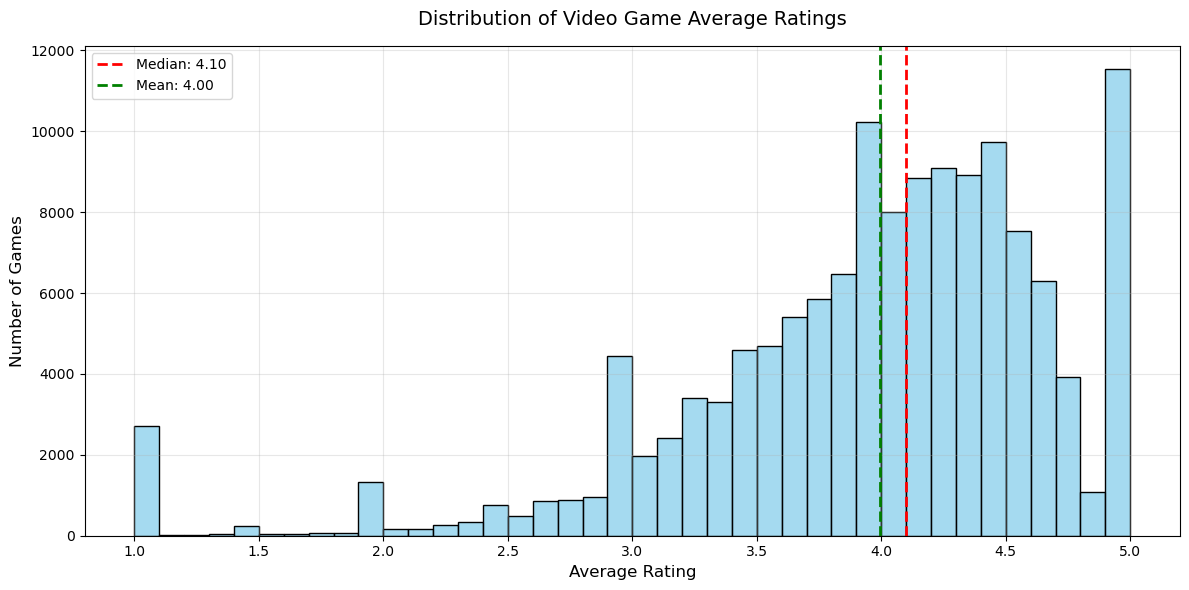


Rating Distribution Statistics:
Total number of games: 137,269
Mean rating: 4.00
Median rating: 4.10
Standard deviation: 0.77


In [27]:
# Import required visualization libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate distribution statistics
median_rating = df_meta_category['average_rating'].median()
mean_rating = df_meta_category['average_rating'].mean()

# Create figure with specified size
plt.figure(figsize=(12, 6))

# Create the histogram with enhanced styling
ax = sns.histplot(data=df_meta_category, 
                 x='average_rating', 
                 binwidth=0.1,
                 color='skyblue',
                 edgecolor='black')

# Add distribution lines
plt.axvline(median_rating, color='red', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_rating:.2f}')
plt.axvline(mean_rating, color='green', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_rating:.2f}')

# Enhance plot styling
plt.title('Distribution of Video Game Average Ratings', fontsize=14, pad=15)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)

# Add legend with statistical information
plt.legend(loc='upper left')

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print additional statistics
print(f"\nRating Distribution Statistics:")
print(f"Total number of games: {len(df_meta_category):,}")
print(f"Mean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Standard deviation: {df_meta_category['average_rating'].std():.2f}")


#### Histogram Analysis
The histogram below shows the frequency distribution of average ratings:
- Each bar represents the count of games within a specific rating range
- The width of each bin is 0.1 rating points
- A red dashed line indicates the median rating
- This visualization helps understand:
  - Most common rating ranges
  - Overall rating distribution shape
  - Any potential rating biases or patterns
  - Central tendency of ratings

## Box Plot Analysis
The box plot provides a statistical summary of the rating distribution:

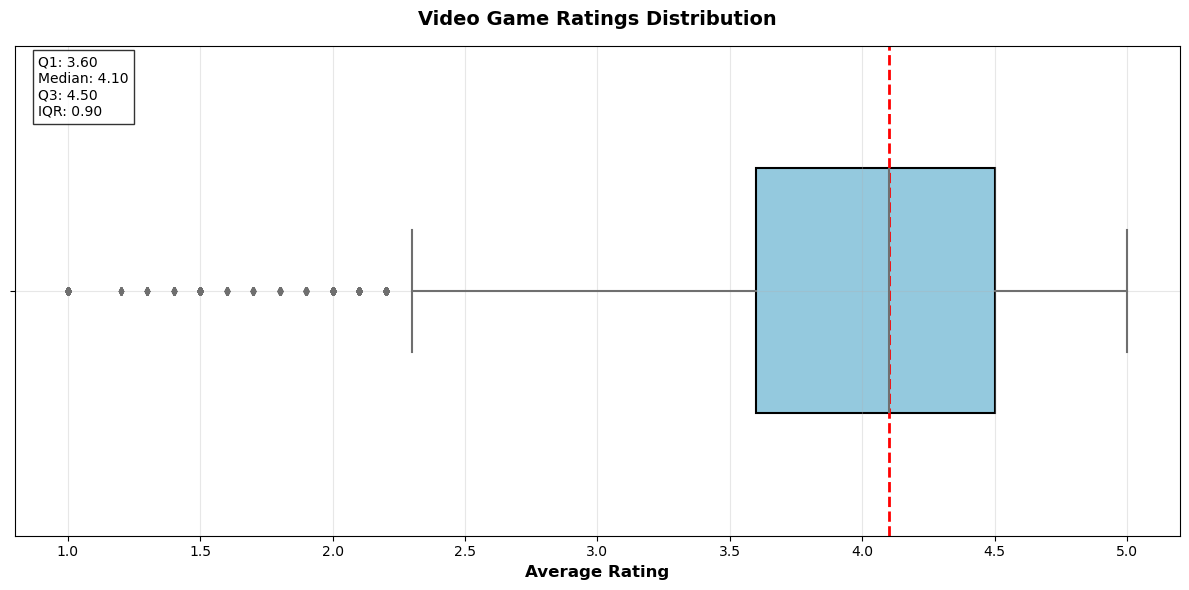


Detailed Quartile Analysis:
Lower whisker: 1.00
Q1 (25th percentile): 3.60
Median: 4.10
Q3 (75th percentile): 4.50
Upper whisker: 5.00
IQR (Interquartile Range): 0.90


In [26]:
# Create figure with specified size
plt.figure(figsize=(12, 6))

# Calculate key statistics for annotations
stats = df_meta_category['average_rating'].describe()

# Create an improved box plot with better styling
sns.boxplot(x=df_meta_category['average_rating'], 
            color='skyblue', 
            width=0.5, 
            fliersize=4, 
            boxprops=dict(edgecolor="black"))

# Add statistical reference lines
median_value = stats['50%']
q1_value = stats['25%']
q3_value = stats['75%']

plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, 
            label=f'Median: {median_value:.2f}')

# Enhance plot styling
plt.xlabel("Average Rating", fontsize=12, fontweight='bold')
plt.title("Video Game Ratings Distribution", fontsize=14, fontweight='bold', pad=15)

# Add statistical annotations
stats_text = (f'Q1: {q1_value:.2f}\n'
             f'Median: {median_value:.2f}\n'
             f'Q3: {q3_value:.2f}\n'
             f'IQR: {(q3_value - q1_value):.2f}')

plt.text(0.02, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8))

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print additional quartile analysis
print("\nDetailed Quartile Analysis:")
print(f"Lower whisker: {stats['min']:.2f}")
print(f"Q1 (25th percentile): {q1_value:.2f}")
print(f"Median: {median_value:.2f}")
print(f"Q3 (75th percentile): {q3_value:.2f}")
print(f"Upper whisker: {stats['max']:.2f}")
print(f"IQR (Interquartile Range): {(q3_value - q1_value):.2f}")



#### Key Components:
- **Box**: Shows the interquartile range (IQR)
  - Bottom edge: 25th percentile (Q1)
  - Middle line: Median (Q2)
  - Top edge: 75th percentile (Q3)
- **Whiskers**: Extend to the most extreme points within 1.5 × IQR
- **Points**: Individual dots show outlier ratings
- **Red line**: Indicates the median value

#### Interpretation:
- Compact view of rating spread and central tendency
- Identifies potential outliers
- Shows rating distribution symmetry/skewness
- Helps spot unusual rating patterns

## Category Distribution Analysis

This visualization analyzes how many categories are assigned to each video game product in our dataset.

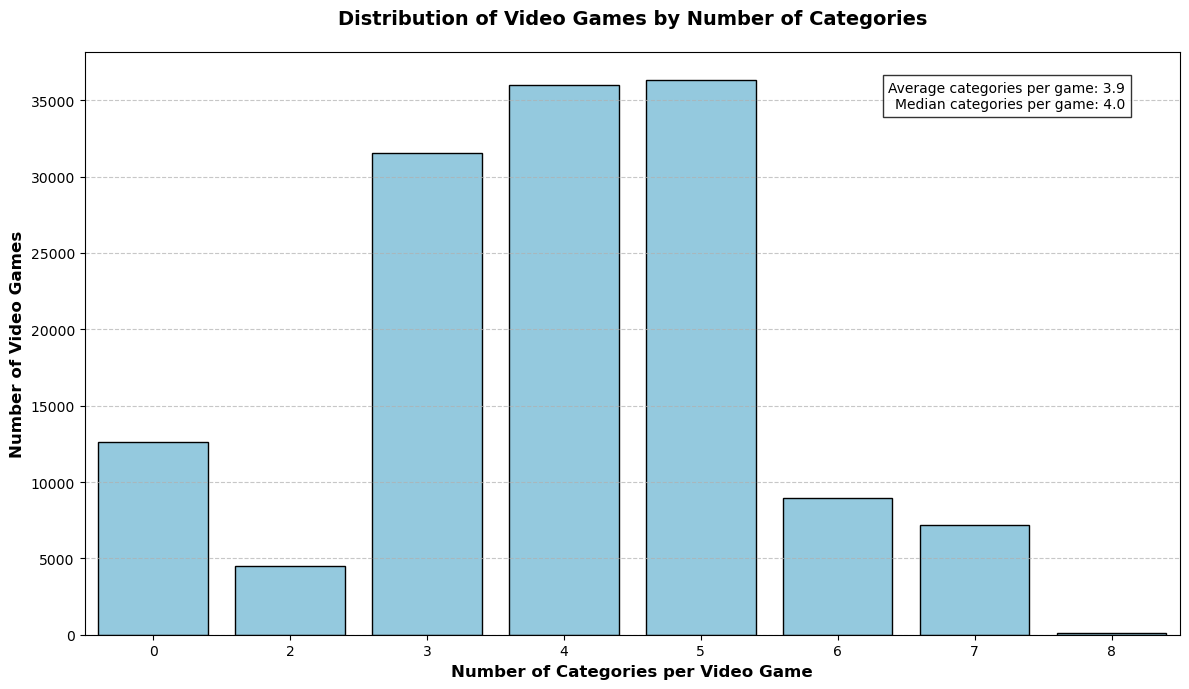

Most common category counts:
                Number of Products
category_count                    
0                            12637
2                             4476
3                            31534
4                            36031
5                            36357


In [ ]:
# Import required visualization libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Isolate category columns
# Skip the first 4 columns (parent_asin, title, average_rating, rating_number)
category_columns = df_meta_category.iloc[:, 4:]  

# Step 2: Convert to boolean for accurate counting
# This ensures we count category presence (1/True) correctly
category_columns = category_columns.astype(bool)

# Step 3: Calculate categories per product
# Sum across rows to count how many categories each product has
df_meta_category["category_count"] = category_columns.sum(axis=1)

# Step 4: Generate distribution data
# Count how many products have each number of categories
category_distribution = df_meta_category["category_count"].value_counts().sort_index()

# Step 5: Create visualization
plt.figure(figsize=(12, 7))  # Larger figure size for better readability

# Create bar plot with enhanced styling
sns.barplot(x=category_distribution.index, 
            y=category_distribution.values, 
            color="skyblue",
            edgecolor="black")

# Add informative labels and title
plt.xlabel("Number of Categories per Video Game", fontsize=12, fontweight="bold")
plt.ylabel("Number of Video Games", fontsize=12, fontweight="bold")
plt.title("Distribution of Video Games by Number of Categories", 
          fontsize=14, fontweight="bold", pad=20)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add summary statistics as text
avg_categories = df_meta_category["category_count"].mean()
median_categories = df_meta_category["category_count"].median()
plt.text(0.95, 0.95, 
         f'Average categories per game: {avg_categories:.1f}\nMedian categories per game: {median_categories:.1f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

# Print additional statistics
print(f"Most common category counts:")
print(category_distribution.head().to_frame('Number of Products'))



### Analysis Purpose
- Understand the complexity of product categorization
- Identify if products typically belong to single or multiple categories
- Visualize the distribution of category assignments

#### Interpretation Guide
- X-axis: Number of categories assigned to a single product
- Y-axis: Count of products with that many categories
- Higher bars at lower numbers suggest most products have few categories
- Long tail to the right indicates some products have many categories

#### Technical Details
- Uses boolean conversion to count categories (True = 1, False = 0)
- Excludes non-category columns (first 4 columns: parent_asin, title, average_rating, rating_number)
- Sorts by category count for better visualization
- Uses seaborn's barplot for enhanced aesthetics

## Category Count vs Rating Analysis

This section explores the relationship between the number of categories a game belongs to and its average rating.This visualization analyzes how many categories are assigned to each video game product in our dataset.

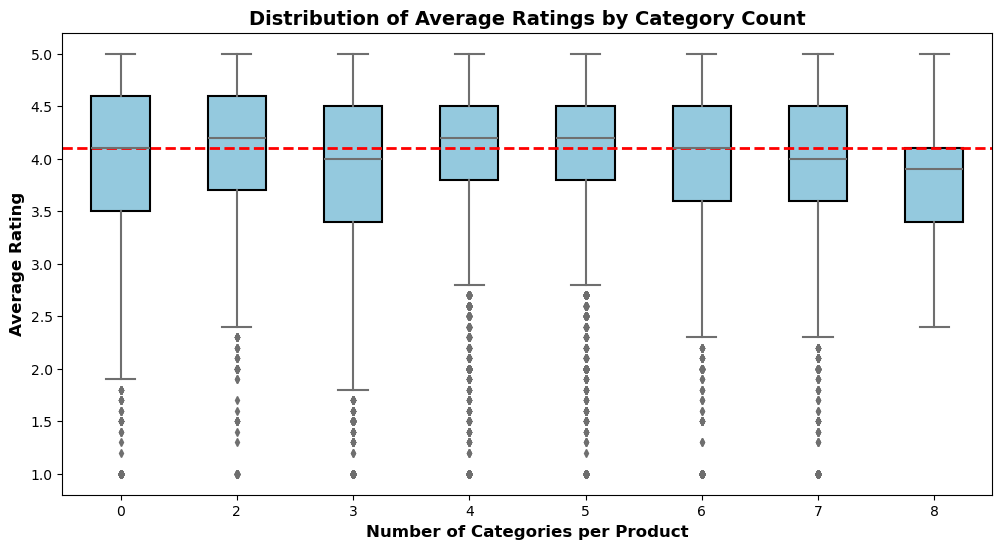

In [ ]:
# Step 1: Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_meta_category["category_count"], y=df_meta_category["average_rating"], 
            color="skyblue", width=0.5, fliersize=4, boxprops=dict(edgecolor="black"))

# Step 1: Compute the overall median rating
overall_median = df_meta_category["average_rating"].median()
# Step 3: Add a horizontal median line
plt.axhline(overall_median, color='red', linestyle='dashed', linewidth=2, 
            label=f"Median: {overall_median:.1f}")

# Step 2: Add labels and title
plt.xlabel("Number of Categories per Product", fontsize=12, fontweight="bold")
plt.ylabel("Average Rating", fontsize=12, fontweight="bold")
plt.title("Distribution of Average Ratings by Category Count", fontsize=14, fontweight="bold")

# Step 3: Show the plot
plt.show()



#### Box Plot Analysis
The visualization shows how ratings are distributed for games with different numbers of categories:
- X-axis shows the number of categories a game belongs to
- Y-axis shows the average rating distribution
- Each box represents the rating distribution for games with that category count
- Red line shows the overall median rating for reference

#### Key Questions Addressed
- Do games with more categories tend to have higher/lower ratings?
- Is there a relationship between category diversity and rating?
- Are there any optimal number of categories for higher ratings?

## Detailed Category-wise Rating Distribution

This visualization provides a detailed breakdown of rating distributions for each category count through individual box plots.

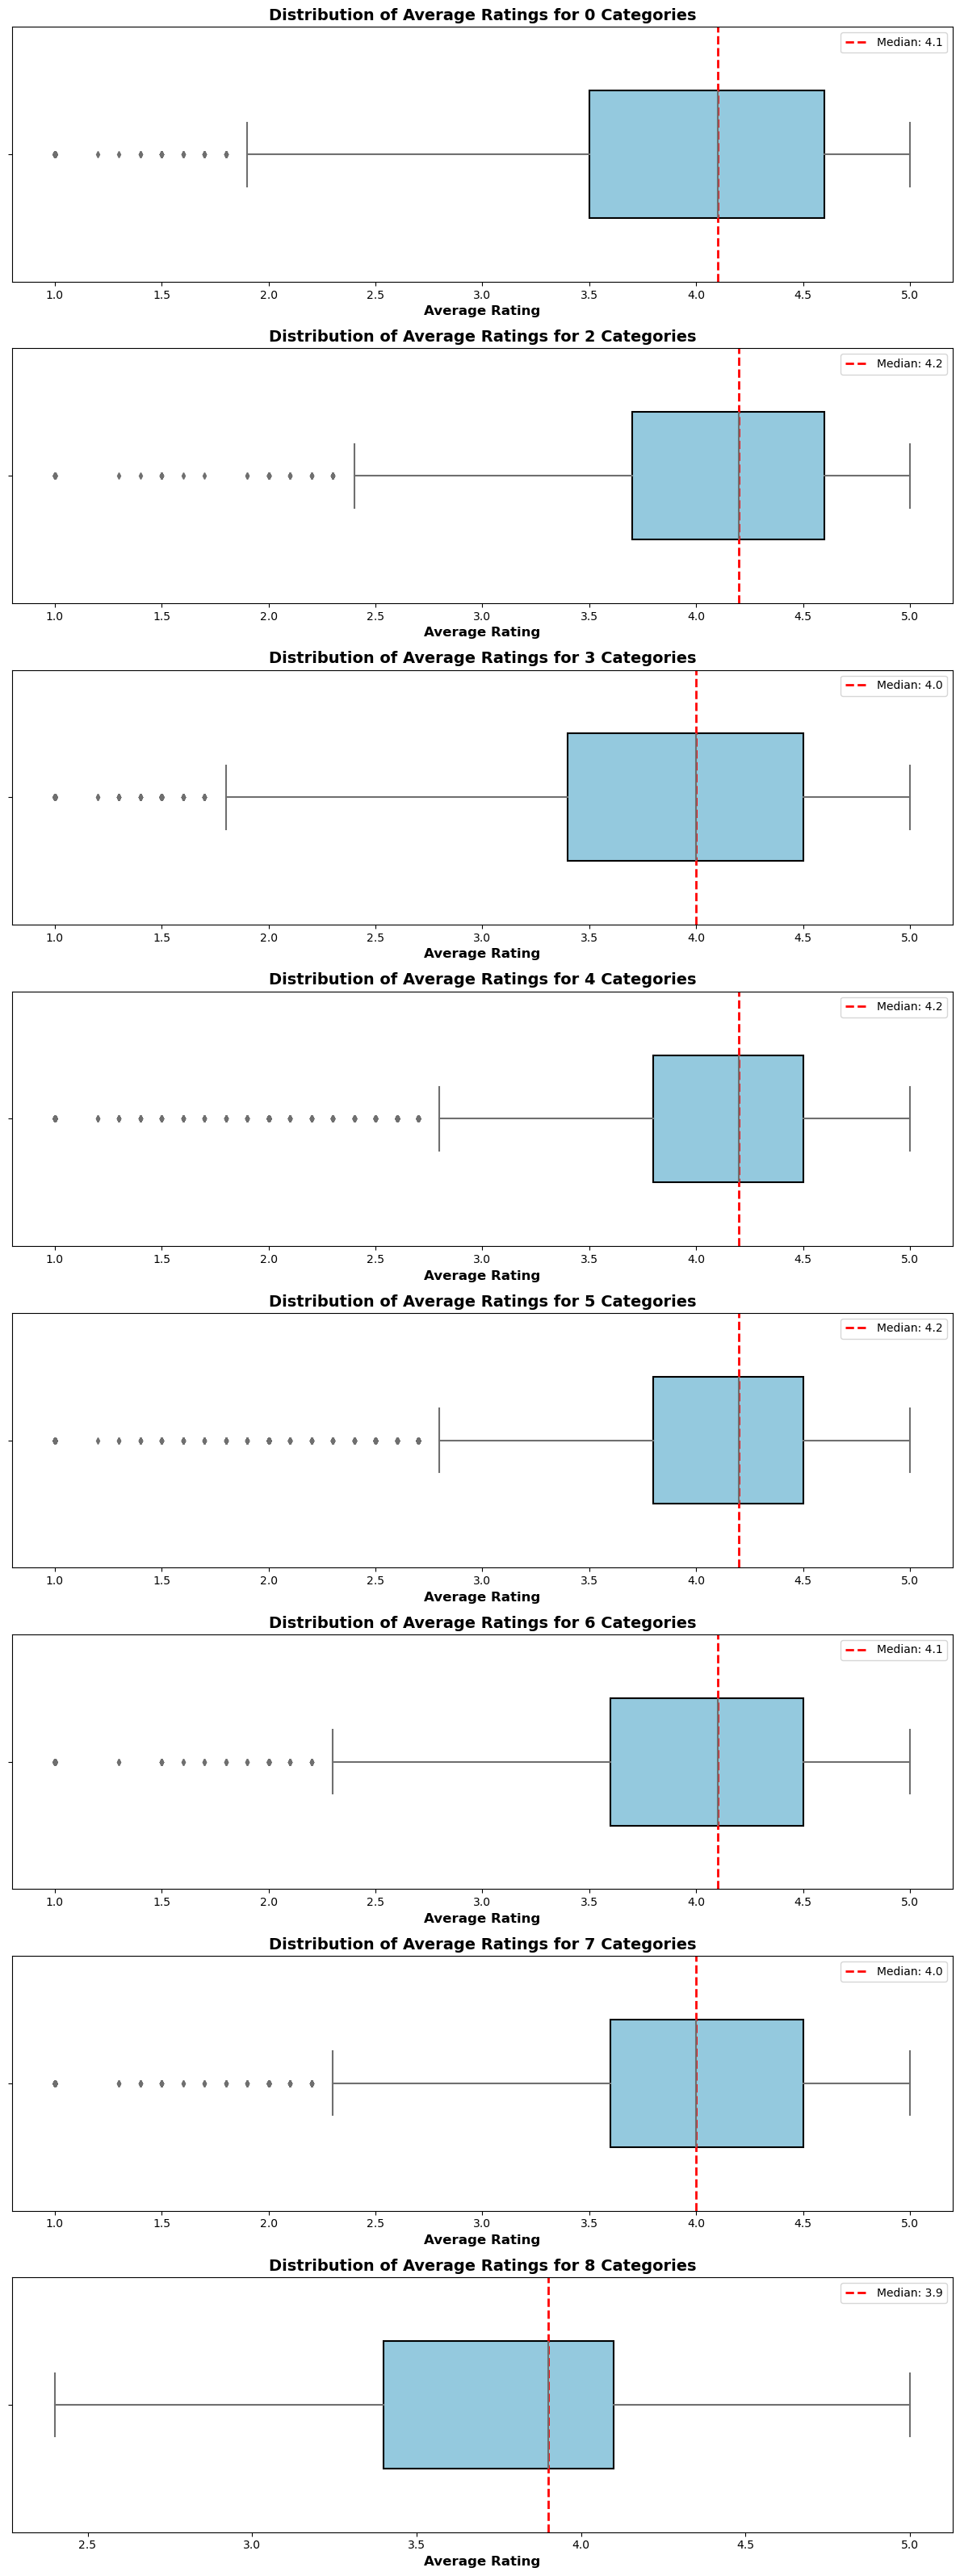

In [ ]:
# Get unique category counts
unique_counts = sorted(df_meta_category["category_count"].unique())

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=len(unique_counts), figsize=(12, len(unique_counts) * 4))

# Loop through each category count and create a separate box plot
for i, count in enumerate(unique_counts):
    ax = axes[i] if len(unique_counts) > 1 else axes  # Handle single subplot case
    subset = df_meta_category[df_meta_category["category_count"] == count]  # Filter data

    sns.boxplot(x=subset["average_rating"], color="skyblue", width=0.5, 
                fliersize=4, boxprops=dict(edgecolor="black"), ax=ax)

    median_value = subset["average_rating"].median()
    ax.axvline(median_value, color='red', linestyle='dashed', linewidth=2, 
               label=f"Median: {median_value:.1f}")

    ax.set_xlabel("Average Rating", fontsize=12, fontweight="bold")
    ax.set_title(f"Distribution of Average Ratings for {count} Categories", fontsize=14, fontweight="bold")
    ax.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


#### Analysis Components
- Separate box plot for each unique category count
- Shows full rating distribution for each count
- Includes median lines and outliers
- Allows detailed comparison across category counts

#### Interpretation Guide
- Compare median ratings across different category counts
- Look for trends in rating spread
- Identify any category counts with unusual distributions
- Check for outliers in specific category counts

## Category-Rating Relationship Heatmap

This heatmap visualization provides a density-based view of the relationship between category counts and ratings.

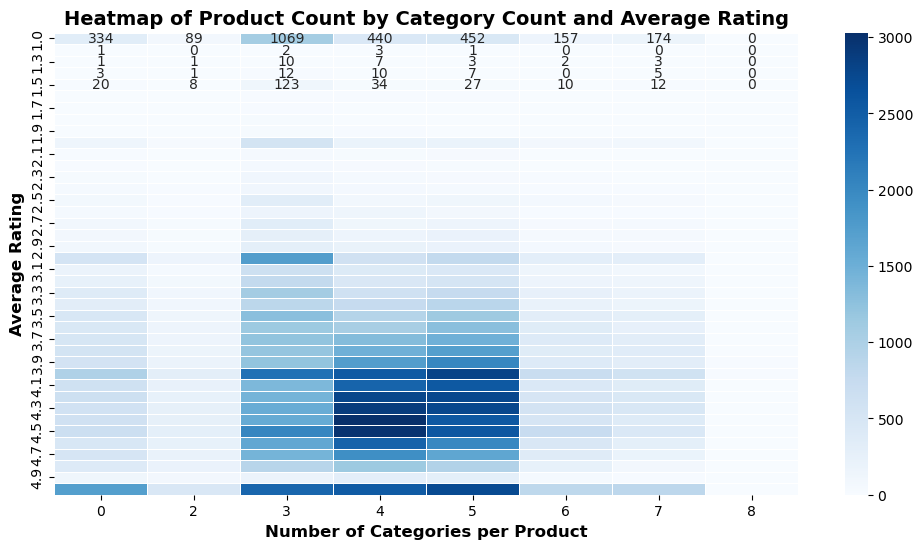

In [ ]:
# Step 1: Count occurrences of each (category_count, average_rating) pair
heatmap_data = df_meta_category.groupby(["category_count", "average_rating"]).size().reset_index(name="count")


# Step 2: Pivot the data for heatmap
heatmap_pivot = heatmap_data.pivot(index="average_rating", columns="category_count", values="count")

# Fix: Replace NaN values with 0
heatmap_pivot = heatmap_pivot.fillna(0)

# Step 3: Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Step 4: Add labels and title
plt.xlabel("Number of Categories per Product", fontsize=12, fontweight="bold")
plt.ylabel("Average Rating", fontsize=12, fontweight="bold")
plt.title("Heatmap of Product Count by Category Count and Average Rating", fontsize=14, fontweight="bold")

# Step 5: Show the plot
plt.show()

#### Visualization Details
- X-axis: Number of categories per product
- Y-axis: Average rating values
- Color intensity: Number of products in each combination
- Numbers in cells: Exact count of products

#### Analysis Benefits
- Identifies common category count and rating combinations
- Shows rating distribution patterns across category counts
- Highlights any clustering or patterns in the data
- Helps spot unusual or rare combinations

#### Business Insights
- Most popular category count and rating combinations
- Potential optimal number of categories for products
- Rating patterns across different levels of categorization

## Popular Categories Analysis

This visualization shows the most common categories in our video games dataset.

Category Statistics:
Total unique categories: 181
Most common category: Video Games (124619 games)
Least common category: 2023 Most Anticipated (1 games)

Top 20 Categories and their counts:
Video Games: 124,619 games
Accessories: 63,120 games
Legacy Systems: 50,925 games
Games: 46,533 games
PC: 37,500 games
Nintendo Systems: 23,525 games
PlayStation Systems: 14,987 games
Nintendo Switch: 12,352 games
Controllers: 10,875 games
PlayStation 4: 10,145 games
Xbox Systems: 8,282 games
Headsets: 7,222 games
Xbox One: 6,916 games
Faceplates, Protectors & Skins: 6,776 games
Cases & Storage: 6,087 games
Wii: 5,734 games
Xbox 360: 5,430 games
PlayStation 3: 4,844 games
Gaming Keyboards: 4,814 games
Nintendo DS: 4,295 games


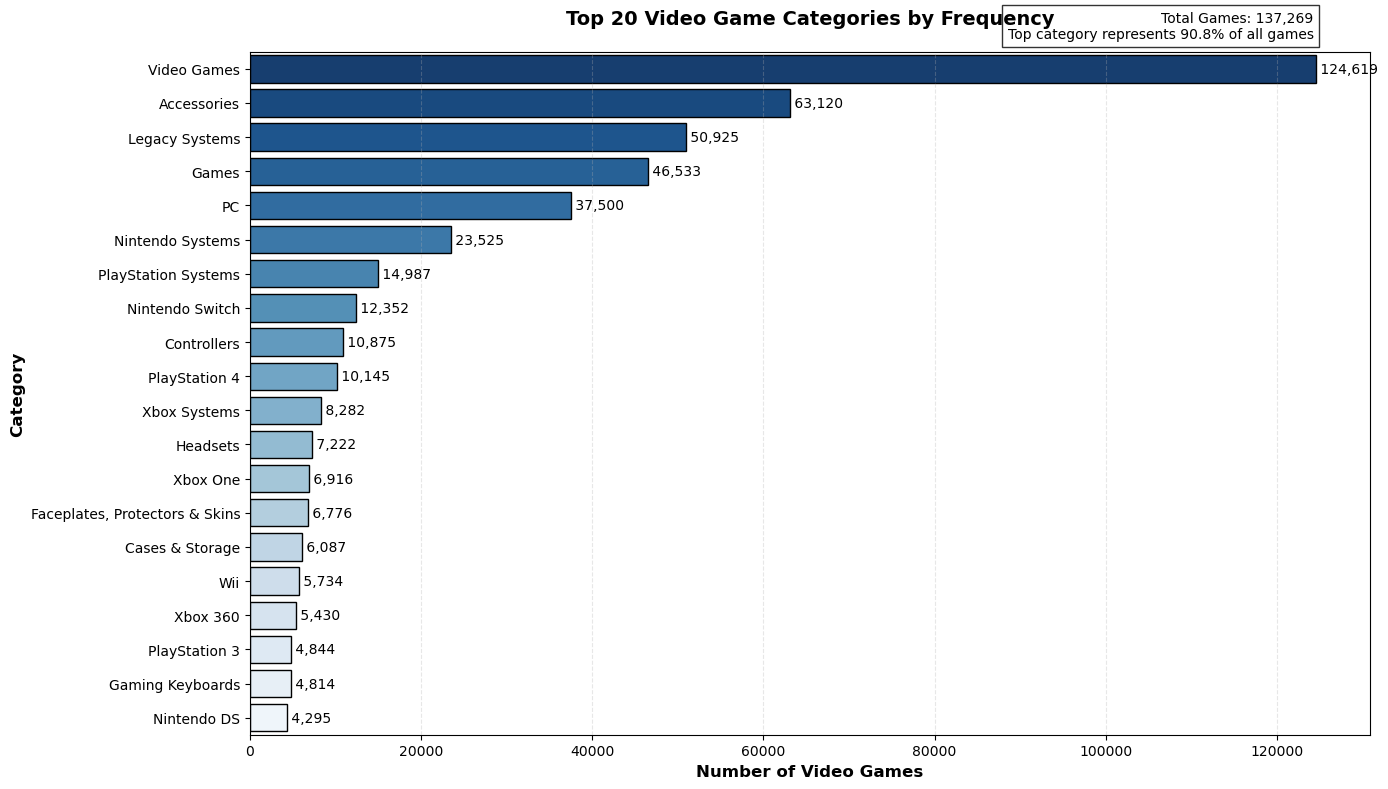

In [ ]:
# Import required libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate category frequencies
# Sum True values for each category to get total number of games
category_counts = category_columns.sum().sort_values(ascending=False)

# Step 2: Select top 20 categories for visualization
top_20_categories = category_counts.head(20)

# Print summary statistics
print("Category Statistics:")
print(f"Total unique categories: {len(category_counts)}")
print(f"Most common category: {category_counts.index[0]} ({category_counts.iloc[0]} games)")
print(f"Least common category: {category_counts.index[-1]} ({category_counts.iloc[-1]} games)")
print("\nTop 20 Categories and their counts:")
for category, count in top_20_categories.items():
    print(f"{category}: {count:,} games")

# Step 3: Create the visualization
plt.figure(figsize=(14, 8))

# Create horizontal bar plot with enhanced styling
ax = sns.barplot(x=top_20_categories.values, 
                y=top_20_categories.index, 
                palette="Blues_r",
                edgecolor="black")

# Add value labels to the end of each bar
for i, v in enumerate(top_20_categories.values):
    ax.text(v, i, f' {v:,}', va='center')

# Enhance the plot with labels and title
plt.xlabel("Number of Video Games", fontsize=12, fontweight="bold")
plt.ylabel("Category", fontsize=12, fontweight="bold")
plt.title("Top 20 Video Game Categories by Frequency", 
          fontsize=14, fontweight="bold", pad=20)

# Add grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Add percentage information
total_games = len(df_meta_category)
plt.text(0.95, 1.02, 
         f'Total Games: {total_games:,}\n' +
         f'Top category represents {(top_20_categories.iloc[0]/total_games)*100:.1f}% of all games',
         transform=plt.gca().transAxes,
         horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()



### Analysis Purpose
- Identify the most prevalent game categories
- Understand market distribution across different genres
- Highlight dominant categories in the dataset

#### Visualization Components
- **X-axis**: Number of games in each category
- **Y-axis**: Category names
- **Bar Colors**: Gradient based on count (darker = more games)
- **Sorted Order**: Categories arranged by frequency (most common at top)

#### Key Insights
- Shows which game categories are most represented
- Helps identify popular genres
- Useful for:
  - Market analysis
  - Category distribution understanding
  - Product portfolio assessment